# LECTURA DE DATOS

In [397]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

In [398]:
df = pd.read_csv("train.csv")

df.drop(["Id","MasVnrArea"],axis=1,inplace=True)
df = df.select_dtypes(include=['float64','int64'])

df.LotFrontage = df.LotFrontage.fillna(df.LotFrontage.median())
df.GarageYrBlt = df.GarageYrBlt.fillna(df.GarageYrBlt.median())

df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [399]:
X = df.drop("SalePrice",axis=1)
y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train = X_train.reset_index()
X_test = X_test.reset_index()

In [400]:
X_train.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

# FILTER METHOD

## SCORE CHI CUADRADO


In [267]:
# import the required functions and object.
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# change this to how much features you want to keep from the top ones.
select_k = 10

# apply the chi2 score on the data and target (target should be binary).  
selection = SelectKBest(chi2, k=select_k).fit(X_train, y_train)

# display the k selected features.
features = X_train.columns[selection.get_support()]

clf_chi10 = tree.DecisionTreeClassifier()
clf_chi10 = clf_chi10.fit(X_train[list(features)], y_train)
mse_chi10 = np.mean((clf_chi10.predict(X_test[list(features)])-y_test)**2)
mse_chi10

4401288891.248962

In [268]:
# import the required functions and object.
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# change this to how much features you want to keep from the top ones.
select_k = 20

# apply the chi2 score on the data and target (target should be binary).  
selection = SelectKBest(chi2, k=select_k).fit(X_train, y_train)

# display the k selected features.
features = X_train.columns[selection.get_support()]

clf_chi20 = tree.DecisionTreeClassifier()
clf_chi20 = clf_chi20.fit(X_train[list(features)], y_train)
mse_chi20 = np.mean((clf_chi20.predict(X_test[list(features)])-y_test)**2)
mse_chi20

3207548746.352697

In [270]:
# import the required functions and object.
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# change this to how much features you want to keep from the top ones.
select_k = 25

# apply the chi2 score on the data and target (target should be binary).  
selection = SelectKBest(chi2, k=select_k).fit(X_train, y_train)

# display the k selected features.
features = X_train.columns[selection.get_support()]

clf_chi30 = tree.DecisionTreeClassifier()
clf_chi30 = clf_chi30.fit(X_train[list(features)], y_train)
mse_chi30 = np.mean((clf_chi30.predict(X_test[list(features)])-y_test)**2)
mse_chi30

4564706608.707469

## CORRELATION

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


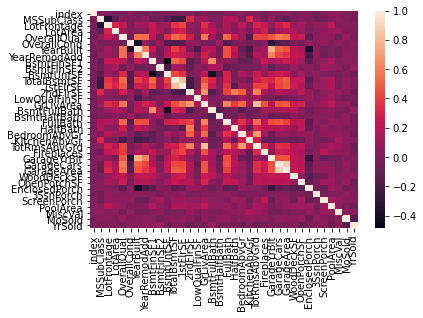

In [255]:
import seaborn as sns
%matplotlib inline

# calculate the correlation matrix
corr = X_train.corr()

# plot the heatmap
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,)

In [259]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    return dataset

In [266]:
X_train_cor90 = correlation(X_train, 0.9)
X_train_cor80 = correlation(X_train, 0.8)
X_train_cor70 = correlation(X_train, 0.7)
X_train_cor60 = correlation(X_train, 0.6)
X_train_cor50 = correlation(X_train, 0.5)

In [271]:
clf_cor_90 = tree.DecisionTreeClassifier()
clf_cor_90 = clf_cor_90.fit(X_train_cor90, y_train)
mse_cor90 = np.mean((clf_cor_90.predict(X_test[X_train_cor90.columns])-y_test)**2)
mse_cor90

4288558120.506224

In [272]:
clf_cor_80 = tree.DecisionTreeClassifier()
clf_cor_80 = clf_cor_80.fit(X_train_cor80, y_train)
mse_cor80 = np.mean((clf_cor_80.predict(X_test[X_train_cor80.columns])-y_test)**2)
mse_cor80

4995054155.956431

In [273]:
clf_cor_70 = tree.DecisionTreeClassifier()
clf_cor_70 = clf_cor_70.fit(X_train_cor70, y_train)
mse_cor70 = np.mean((clf_cor_70.predict(X_test[X_train_cor70.columns])-y_test)**2)
mse_cor70

4728950994.338174

In [274]:
clf_cor_60 = tree.DecisionTreeClassifier()
clf_cor_60 = clf_cor_60.fit(X_train_cor60, y_train)
mse_cor60 = np.mean((clf_cor_60.predict(X_test[X_train_cor60.columns])-y_test)**2)
mse_cor60

4087213403.5954356

In [275]:
clf_cor_50 = tree.DecisionTreeClassifier()
clf_cor_50 = clf_cor_50.fit(X_train_cor50, y_train)
mse_cor50 = np.mean((clf_cor_50.predict(X_test[X_train_cor50.columns])-y_test)**2)
mse_cor50

4008411732.06639

## COEFICIENTE DE VARIACIÓN

In [300]:
treshold=0.1
variables_cv10 = []

for i in range(X_train.shape[1]):
  # print("el cv de la variable {} es: {}".format(X_train.columns[i],scipy.stats.variation(X_train.iloc[:,i])))
  if scipy.stats.variation(X_train.iloc[:,i]) >= treshold:
    variables_cv10.append(X_train.columns[i])

clf_cv_10 = tree.DecisionTreeClassifier()
clf_cv_10 = clf_cv_10.fit(X_train[variables_cv10], y_train)
mse_cv10 = np.mean((clf_cv_10.predict(X_test[variables_cv10])-y_test)**2)
mse_cv10

4099999088.280083

In [302]:
treshold=0.5
variables_cv50 = []

for i in range(X_train.shape[1]):
  # print("el cv de la variable {} es: {}".format(X_train.columns[i],scipy.stats.variation(X_train.iloc[:,i])))
  if scipy.stats.variation(X_train.iloc[:,i]) >= treshold:
    variables_cv50.append(X_train.columns[i])

clf_cv_50 = tree.DecisionTreeClassifier()
clf_cv_50 = clf_cv_50.fit(X_train[variables_cv50], y_train)
mse_cv50 = np.mean((clf_cv_50.predict(X_test[variables_cv50])-y_test)**2)
mse_cv50

4893410244.489627

In [303]:
treshold=1.0
variables_cv100 = []

for i in range(X_train.shape[1]):
  # print("el cv de la variable {} es: {}".format(X_train.columns[i],scipy.stats.variation(X_train.iloc[:,i])))
  if scipy.stats.variation(X_train.iloc[:,i]) >= treshold:
    variables_cv100.append(X_train.columns[i])

clf_cv_100 = tree.DecisionTreeClassifier()
clf_cv_100 = clf_cv_100.fit(X_train[variables_cv100], y_train)
mse_cv100 = np.mean((clf_cv_100.predict(X_test[variables_cv100])-y_test)**2)
mse_cv100

5756680164.713693

# WRAPPER METHOD


## DECISION TREE

In [385]:
clf_dt1 = tree.DecisionTreeClassifier()
clf_dt1 = clf_dt1.fit(X_train, y_train)
mse_dt1 = np.mean((clf_dt1.predict(X_test)-y_test)**2)

d = {'variable':    pd.Series(X_train.columns),
     'importancia': pd.Series(list(clf_dt1.feature_importances_))}
importance = pd.DataFrame(data=d)

mse_dt1


3177846753.9896264

In [386]:
clf_dt2 = tree.DecisionTreeClassifier()
clf_dt2 = clf_dt2.fit(X_train[list(importance.sort_values(by=['importancia'],ascending=False).variable.head(25))], y_train)
mse_dt2 = np.mean((clf_dt2.predict(X_test[list(importance.sort_values(by=['importancia'],ascending=False).variable.head(25))])-y_test)**2)

d = {'variable':    pd.Series(X_train[list(importance.sort_values(by=['importancia'],ascending=False).variable.head(25))].columns),
     'importancia': pd.Series(list(clf_dt2.feature_importances_))}
importance = pd.DataFrame(data=d)

mse_dt2

4279121317.280083

In [387]:
clf_dt3 = tree.DecisionTreeClassifier()
clf_dt3 = clf_dt3.fit(X_train[list(importance.sort_values(by=['importancia'],ascending=False).variable.head(20))], y_train)
mse_dt3 = np.mean((clf_dt3.predict(X_test[list(importance.sort_values(by=['importancia'],ascending=False).variable.head(20))])-y_test)**2)

d = {'variable':    pd.Series(X_train[list(importance.sort_values(by=['importancia'],ascending=False).variable.head(20))].columns),
     'importancia': pd.Series(list(clf_dt3.feature_importances_))}
importance = pd.DataFrame(data=d)

mse_dt3

3582052826.966805

In [388]:
clf_dt4 = tree.DecisionTreeClassifier()
clf_dt4 = clf_dt4.fit(X_train[list(importance.sort_values(by=['importancia'],ascending=False).variable.head(15))], y_train)
mse_dt4 = np.mean((clf_dt4.predict(X_test[list(importance.sort_values(by=['importancia'],ascending=False).variable.head(15))])-y_test)**2)

d = {'variable':    pd.Series(X_train[list(importance.sort_values(by=['importancia'],ascending=False).variable.head(15))].columns),
     'importancia': pd.Series(list(clf_dt4.feature_importances_))}
importance = pd.DataFrame(data=d)

mse_dt4

4204452156.201245

## RANDOM FOREST

In [393]:
from sklearn.ensemble import RandomForestClassifier

clf_rf1 = RandomForestClassifier(max_depth=5, random_state=0)
clf_rf1.fit(X_train, y_train)
mse_rf1 = np.mean((clf_rf1.predict(X_test)-y_test)**2)

d = {'variable':    pd.Series(X_train.columns),
     'importancia': pd.Series(list(clf_rf1.feature_importances_))}
importance = pd.DataFrame(data=d)

mse_rf1

2644256477.325726

In [394]:
clf_rf2 = RandomForestClassifier(max_depth=5, random_state=0)
clf_rf2.fit(X_train[list(importance.sort_values(by=['importancia'],ascending=False).variable.head(25))], y_train)
mse_rf2 = np.mean((clf_rf2.predict(X_test[list(importance.sort_values(by=['importancia'],ascending=False).variable.head(25))])-y_test)**2)

d = {'variable':    pd.Series(X_train[list(importance.sort_values(by=['importancia'],ascending=False).variable.head(25))].columns),
     'importancia': pd.Series(list(clf_rf2.feature_importances_))}
importance = pd.DataFrame(data=d)

mse_rf2

3290581590.715768

In [395]:
clf_rf3 = RandomForestClassifier(max_depth=5, random_state=0)
clf_rf3.fit(X_train[list(importance.sort_values(by=['importancia'],ascending=False).variable.head(20))], y_train)
mse_rf3 = np.mean((clf_rf3.predict(X_test[list(importance.sort_values(by=['importancia'],ascending=False).variable.head(20))])-y_test)**2)

d = {'variable':    pd.Series(X_train[list(importance.sort_values(by=['importancia'],ascending=False).variable.head(20))].columns),
     'importancia': pd.Series(list(clf_rf3.feature_importances_))}
importance = pd.DataFrame(data=d)

mse_rf3

3765104650.9647303

In [396]:
clf_rf4 = RandomForestClassifier(max_depth=5, random_state=0)
clf_rf4.fit(X_train[list(importance.sort_values(by=['importancia'],ascending=False).variable.head(15))], y_train)
mse_rf4 = np.mean((clf_rf4.predict(X_test[list(importance.sort_values(by=['importancia'],ascending=False).variable.head(15))])-y_test)**2)

d = {'variable':    pd.Series(X_train[list(importance.sort_values(by=['importancia'],ascending=False).variable.head(15))].columns),
     'importancia': pd.Series(list(clf_rf4.feature_importances_))}
importance = pd.DataFrame(data=d)

mse_rf4

2716802754.7614107

# ALGORITMOS GENÉTICOS

## ONEPOINT

In [ ]:
# GENERACIÓN DE INDIVIDUOS

pop_size = 100
poblacion = []
generaciones = 75
fitness_gen = []

for j in range(pop_size):
  individuo = []
  for i in range(X_train.shape[1]): 
    individuo.append(random.uniform(0, 1) > 0.5)
  poblacion.append(individuo)

for i in range(generaciones):
  print(i)
  fitness = []

  for i in range(pop_size):
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(X_train.loc[:, poblacion[i]], y_train)
    mse = 1/np.mean((clf.predict(X_test.loc[:, poblacion[i]])-y_test)**2)
    fitness.append(mse)

  fitness_gen.append(sum(fitness)/pop_size)
  prob = []

  for i in range(pop_size):
    prob.append(fitness[i]/sum(fitness))

  poblacion_new = []

  for i in range(int(pop_size/2)):
    c = random.randrange(X_train.shape[1])
    draw = choice(range(100), 2,p=prob)
    ind1 = poblacion[draw[0]][c:] + poblacion[draw[1]][:c]
    ind2 = poblacion[draw[1]][c:] + poblacion[draw[0]][:c]
    poblacion_new.append(ind1)
    poblacion_new.append(ind2)

  poblacion = poblacion_new

In [408]:

for i in [0,15,30,45,60,74]:
  print("el valor de MSE en la generación {} es: {}".format(i,1/fitness_gen[i]))

el valor de MSE en la generación 0 es: 3390819617.5967736
el valor de MSE en la generación 15 es: 3193814090.161207
el valor de MSE en la generación 30 es: 3199121677.264725
el valor de MSE en la generación 45 es: 3150502463.8947372
el valor de MSE en la generación 60 es: 3287739650.8862205
el valor de MSE en la generación 74 es: 3252480604.1397014


In [410]:
sum(individuo)

18